In [1]:
from facenet_sandberg import Identifier, get_image_from_path_rgb, get_image_from_path_bgr, \
                            Detector, embedding_distance, DistanceMetric, get_images_from_dir, \
                            get_dataset, tsne_sklearn, tsne_tensorboard
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from sklearn.manifold import TSNE
import glob
import cv2
import PIL


%matplotlib inline

### Get images

In [ ]:
noam_chomsky_1 = get_image_from_path_rgb("noam-chomsky-1.jpg")
noam_chomsky_2 = get_image_from_path_rgb("noam-chomsky-2.jpg")
not_noam_chomsky = get_image_from_path_rgb("not-noam-chomsky.jpg")

In [ ]:
def plot_images(image_1, image_2):
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image_1)
    f.add_subplot(1,2, 2)
    plt.imshow(image_2)

In [ ]:
images = list(get_images_from_dir('people/noam_chomsky', recursive=False))
plt.imshow(images[3])

# Align

In [ ]:
detector = Detector()

In [ ]:
faces = detector.find_faces(noam_chomsky_1)

In [ ]:
plot_images(noam_chomsky_1, faces[0].image)

### Bulk align

In [ ]:
aligned_images = list(detector.bulk_find_face(images))

In [ ]:
plt.imshow(aligned_images[3][0].image)

# Vectorize

In [ ]:
identifier = Identifier(model_path=os.path.join('models','facenet_model.pb'))

### Get single face vectors

In [ ]:
# vectorize() returns an array of vectors, one for each face in a single image (we grab the first because there is only one
# face in these images)
vector_1 = identifier.vectorize(noam_chomsky_1)[0]
vector_2 = identifier.vectorize(noam_chomsky_2)[0]
vector_3 = identifier.vectorize(not_noam_chomsky)[0]

In [ ]:
vector_1

### Visualize face encodings: Facenet

In [ ]:
noam_images = list(map(get_image_from_path_rgb, glob.glob("people/noam_chomsky/*.*")))
other_people = list(map(get_image_from_path_rgb, glob.glob("people/foucault/*.*")))

In [ ]:
# We use the bulk encoding method vectorize_all() because it's much faster 
# Filter out empty arrays and grab the first item from each array of vectors per image 
noam_vectors = list(map(lambda x : x[0], filter(None, identifier.vectorize_all(noam_images, prealigned=False))))
other_vectors = list(map(lambda x : x[0], filter(None, identifier.vectorize_all(other_people, prealigned=False))))

In [ ]:
# combine into one features array
features = np.array(noam_vectors + other_vectors)
# label each feature (0 is noam and 1 is not noam)
labels = np.array(([0] * len(noam_vectors)) + ([1] * len(other_vectors)) )

In [ ]:
# use tsne to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=0)
reduced = tsne.fit_transform(features)

In [ ]:
plt.figure(figsize=(20, 20))
colors = 'r', 'g',
for i, c, label in zip([0, 1], colors, ['noam_chomsky', 'foucault']):
    plt.scatter(reduced[labels == i, 0], reduced[labels == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Visualize face encodings: Insightface

In [ ]:
noam_images_bgr = list(map(get_image_from_path_bgr, glob.glob("people/noam_chomsky/*.*")))
other_people_bgr = list(map(get_image_from_path_bgr, glob.glob("people/foucault/*.*")))

In [ ]:
insightface = Identifier(model_path=os.path.join('models','insightface', 'insightface_ckpt'), is_insightface=True)
noam_vectors_insightface = list(map(lambda x : x[0], filter(None, insightface.vectorize_all(noam_images_bgr, prealigned=False))))
other_vectors_insightface = list(map(lambda x : x[0], filter(None, insightface.vectorize_all(other_people_bgr, prealigned=False))))
# combine into one features array
features_insightface = np.array(noam_vectors_insightface + other_vectors_insightface)
# label each feature (0 is noam and 1 is not noam)
labels_insightface = np.array(([0] * len(noam_vectors_insightface)) + ([1] * len(other_vectors_insightface)))
# use tsne to reduce dimensionality for visualization
tsne_insightface = TSNE(n_components=2, random_state=0)
reduced_insightface = tsne_insightface.fit_transform(features_insightface)

In [ ]:
plt.figure(figsize=(20, 20))
colors = 'r', 'g',
for i, c, label in zip([0, 1], colors, ['noam_chomsky', 'foucault']):
    plt.scatter(reduced_insightface[labels_insightface == i, 0], reduced_insightface[labels_insightface == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Visualize face encodings: directory

In [ ]:
tsne_sklearn(
        img_dir="/Users/armanrahman/facenet_sandberg/notebooks/people",
        model_path="/Users/armanrahman/models/facenet_model.pb",
        is_insightface=False,
        prealigned=False,
        is_flat=False,
        log_dir="log_dir")

Encoding:100% |##########################| Time:  0:00:08 Elapsed Time: 0:00:08
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


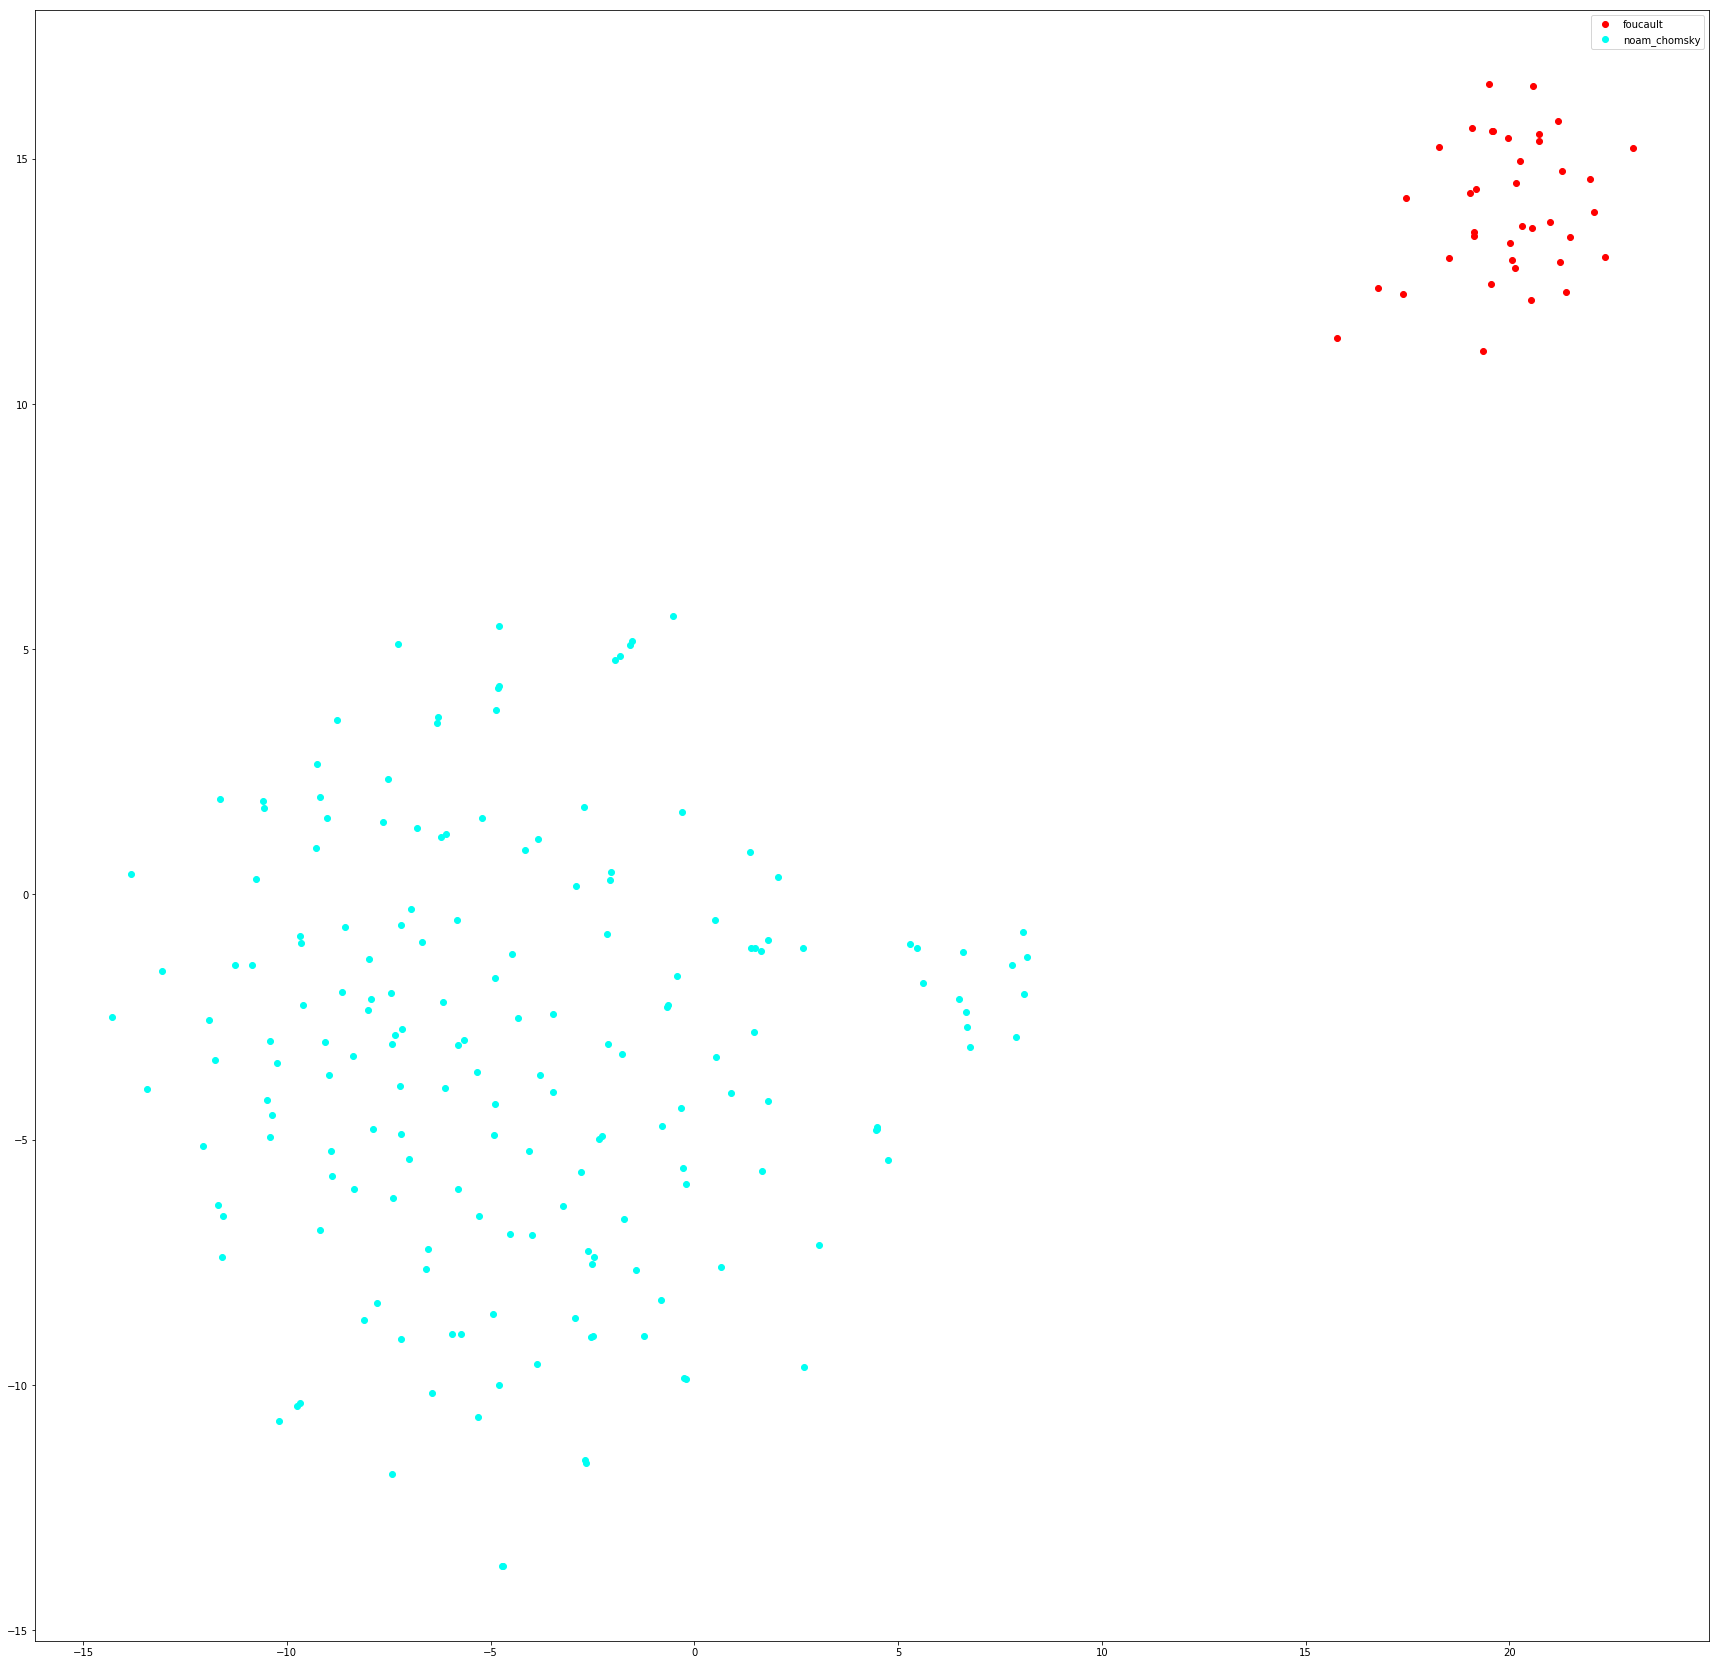

In [2]:
plt = tsne_sklearn(
        img_dir="/Users/armanrahman/facenet_sandberg/notebooks/people",
        model_path="/Users/armanrahman/models/facenet_model.pb",
        is_insightface=False,
        prealigned=False,
        is_flat=False,
        save_plt=False)

# Compare two faces

In [ ]:
plot_images(noam_chomsky_1, noam_chomsky_2)

In [ ]:
identifier.compare_images(noam_chomsky_1, noam_chomsky_2).is_match

In [ ]:
plot_images(noam_chomsky_2, not_noam_chomsky)

In [ ]:
identifier.compare_images(noam_chomsky_2, not_noam_chomsky).is_match